# WeatherPy

---

## Notebook Setup

### Dependencies

In [22]:
# Import Dependencies
import pandas as pd
from pathlib import Path

# Personally written functions & Transferred `Starter Code`
import gcs_fx as gcs

# Import OpenWeatherMap API Key
from api_keys import weather_api_key

### Modulated Starter Code

#### Random Coordinate Generator
To generate random geographic coordinates, a list of cities, and perform an API call for each city (method definitions moved to back-end GCS_Fx.py along with libraries time, numpy, and citipy, and requests)

In [23]:
# citipy method moved to backend GCS_Fx.py
# Easy access to custom sizes and specific coordinate ranges through arguments
# METHODS FOR USING CITIPY PROVIDED IN SOURCE CODE BY 'edX/2U'
cities = gcs.city_generator(curve_size = 1500)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


#### OpenWeather API Call
Using OpenWeather API to retrieve weather data from the cities generated. The starter code provided utilized the libraries requests and time to fetch data.

In [24]:
# Use the requests module and the Open Weather API to gather weather data for the list of cities
# SOURCE CODE was provided in Starter Code by edX/2U
log_startTime = gcs.asctime()
api_response, queries = gcs.api_openWeather(cities, weather_api_key, query_remainder = 1000)

You've requested 616 queries. You have 1000 per day.
If you continue you will have only 384 afterwards.


API call canceled! 
Return Code: 0


In [25]:
file_path = Path('output_data/openWeatherAPI.txt')
if type(api_response) == dict:
    try:
        with open(file_path, 'a') as file:
            lines = (
                f'Remaining Queries:  {queries}\n' +
                f'Time Accessed:      {log_startTime}\n'
            )
            file.writelines(lines)
            print('Lines successfully written:\n' + lines + '\n')
    except:
        print(f'Error! Could not create/write to {file_path.name}.')
else:
    print(f'{file_path.name} not opened for writing.')

print(
    f'Access to Open Weather API is limited to 1000 queries per 24 hours.\n' +
    f'Please use your {file_path.name} log to find out when your limit will be refreshed.'
    )

openWeatherAPI.txt not opened for writing.
Access to Open Weather API is limited to 1000 queries per 24 hours.
Please use your openWeatherAPI.txt log to find out when your limit will be refreshed.


---
## Requirement 1 - Bivariable graphing

### DataFraming
Use JSON data from API Call to create a new DataFrame - save DataFrame to new CSV for later use

In [26]:
# Convert the cities weather data into a Pandas DataFrame
# if api_response is of the correct type (not an error code)
if type(api_response) == dict:
    api_response = pd.DataFrame(api_response)
    print('NonNa Value Counts by Column:')
    display(api_response.count())
    print('*'* 100)
    print('\nDataFrame Sampling:')
    display(api_response.head(10))
else:
    print('Avoiding DataFrame creation and data sampling...')

Avoiding DataFrame creation and data sampling...


In [27]:
# Export the City_Data into a csv
# Handles error codes of gcs.api_openWeather()

outPath = Path('output_data')
if outPath.exists():
    print(f'{outPath.name} directory already exists.')
if not outPath.exists():
    Path.mkdir(outPath.name)
    print(f'New directory {outPath.name} created.')
try:
    api_response.to_csv('output_data/cities.csv', index_label = 'City_ID')
    print(f'CSV file successfully saved')
except:
    if type(api_response) == int:
        if api_response == -1:
            print('DataFrame export avoided because API call had an error.')
        elif api_response == 0:
            print('DataFrame export avoided because API call was canceled.')

output_data directory already exists.
DataFrame export avoided because API call was canceled.


In [28]:
# Read and sample saved data 
try:
    cityData_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
    display(cityData_df.head(10))
except:
    print('Sorry, cities.csv does not exist.')

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gabane,-24.6667,25.7822,22.29,72,92,1.69,BW,1735604830
1,mayo-belwa,9.0500,12.0500,22.46,24,70,0.99,NG,1735604832
2,grytviken,-54.2811,-36.5092,5.85,79,54,3.07,GS,1735604833
3,ushuaia,-54.8000,-68.3000,8.81,100,100,1.54,AR,1735604588
4,hamilton,39.1834,-84.5333,8.90,78,0,3.09,US,1735604406
5,waitangi,-43.9535,-176.5597,16.57,97,100,4.47,NZ,1735604836
6,jamestown,42.0970,-79.2353,2.79,96,40,3.58,US,1735604715
7,brookings,44.3114,-96.7984,1.14,97,100,3.60,US,1735604839
8,nantucket,41.2835,-70.0995,8.41,93,0,6.17,US,1735604840


### Scatter Plots
Create Plots to Showcase the Relationship Between Weather Variables and Latitude

#### Latitude Vs. Temperature

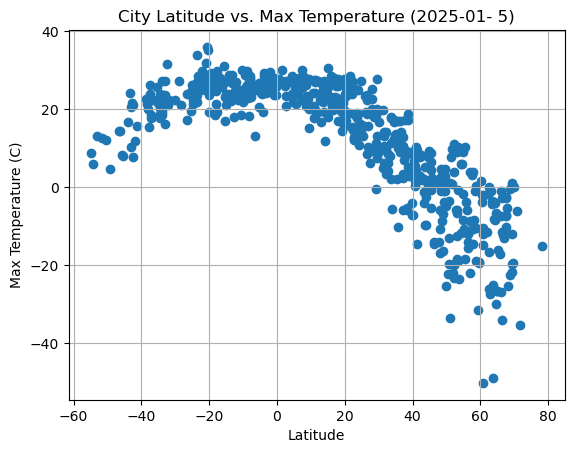

| PyPlot flushed:
| Be advised - not saving


In [29]:
# Build scatter plot for latitude vs. temperature
gcs.s_plot(cityData_df, 'Lat', 'Max Temp')

# Save the figure and show the plot
# gcs.flush('Fig1_Lat_Temp')
gcs.flush()

#### Latitude Vs. Humidity

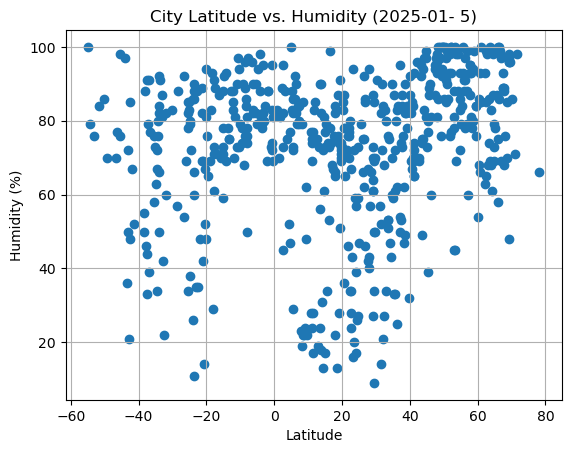

| PyPlot flushed:
| Be advised - not saving


In [30]:
# Build the scatter plots for latitude vs. humidity
gcs.s_plot(cityData_df, 'Lat', 'Humidity')

# Save and show the figure
# gcs.flush('Fig2_Lat_Humidity')
gcs.flush()

#### Latitude Vs. Cloudiness

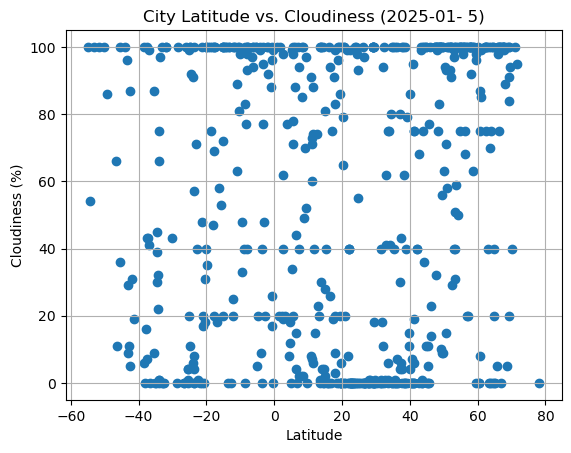

| PyPlot flushed:
| Be advised - not saving


In [31]:
# Build the scatter plots for latitude vs. cloudiness
gcs.s_plot(cityData_df, 'Lat', 'Cloudiness')

# Save and show the figure
# gcs.flush('Fig3_Lat_Clouds')
gcs.flush()

#### Latitude vs. Wind Speed Plot

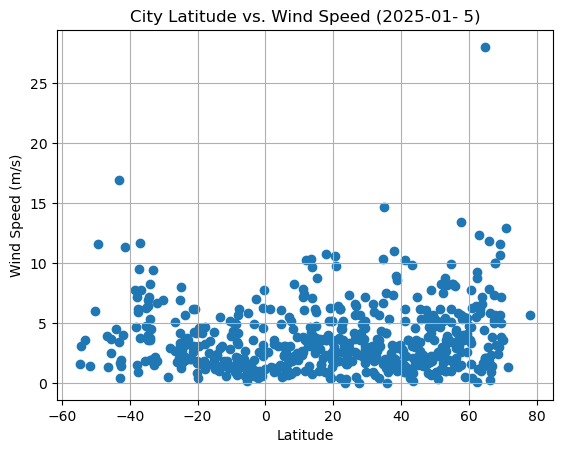

| PyPlot flushed:
| Be advised - not saving


In [32]:
# Build the scatter plots for latitude vs. wind speed
gcs.s_plot(cityData_df, 'Lat', 'Wind Speed')

# Save and show the figure
# gcs.flush('Fig4_Lat_Wind')
gcs.flush()

---
## Requirement 2 - Linear Regression

### DataFraming of Hemispheres

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
hemi_north_df = cityData_df.loc[cityData_df['Lat'] >= 0, :]

# Display sample data
hemi_north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mayo-belwa,9.0500,12.0500,22.46,24,70,0.99,NG,1735604832
4,hamilton,39.1834,-84.5333,8.90,78,0,3.09,US,1735604406
6,jamestown,42.0970,-79.2353,2.79,96,40,3.58,US,1735604715
7,brookings,44.3114,-96.7984,1.14,97,100,3.60,US,1735604839
8,nantucket,41.2835,-70.0995,8.41,93,0,6.17,US,1735604840


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
hemi_south_df = cityData_df.loc[cityData_df['Lat'] < 0, :]

# Display sample data
hemi_south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gabane,-24.6667,25.7822,22.29,72,92,1.69,BW,1735604830
2,grytviken,-54.2811,-36.5092,5.85,79,54,3.07,GS,1735604833
3,ushuaia,-54.8000,-68.3000,8.81,100,100,1.54,AR,1735604588
5,waitangi,-43.9535,-176.5597,16.57,97,100,4.47,NZ,1735604836
10,touros,-5.1989,-35.4608,26.74,79,5,5.84,BR,1735604843


### Multiplot - Linear Regression

####  Temperature vs. Latitude Linear Regression Plot

The r^2-value is:                0.7371875859511748
The correlation coefficient is: -0.8585962881070328


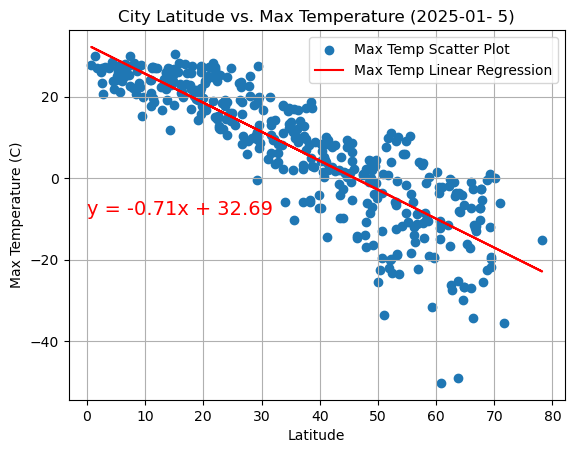

| PyPlot flushed:
| Be advised - not saving


In [35]:
# Linear regression on Northern Hemisphere
gcs.r_plot(hemi_north_df, 'Lat', 'Max Temp', (0, -9))
gcs.flush()

The r^2-value is:                0.3553962084157189
The correlation coefficient is:  0.5961511623872916


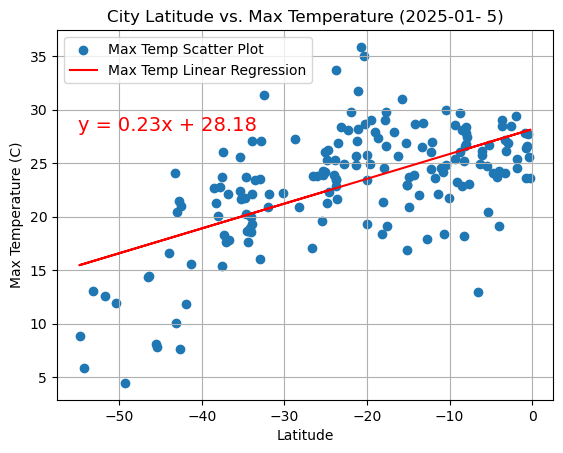

| PyPlot flushed:
| Be advised - not saving


In [36]:
# Linear regression on Southern Hemisphere
gcs.r_plot(hemi_south_df, 'Lat', 'Max Temp', (-55, 28))
gcs.flush()

##### **Discussion about the linear relationship:**  
The linear relationship held between the latitude of a city somewhere on Earth and the maximum  
temperature of that city today is very relevant. While it definitely can't always be said, it  
is a fair generalization to make most of the time that: "The maximum temperature of a city will  
increase as you get closer to the equator." The most important caveat to this is that this  
relationship is approximately 38% more valid when examining the Northern Hemisphere as opposed  
to the Souther Hemisphere. Another interesting and important factoid is that the temperature's  
relationship to the latitude becomes a greater factor the closer it is the equator, visually it  
seems that the range of the data set decreases along this trend and the data points become  
grouped tighter together.  

This definitely makes sense here where the equator is generally considered to be the hottest  
parallel line around the Earth, but there will always be outliers depending on the climate and  
geography of the specific location. It's interesting how the data on the Southern Hemisphere  
becomes less representable as a linear trend though.  

#### Humidity vs. Latitude Linear Regression Plot

The r^2-value is:                0.16036953925467462
The correlation coefficient is:  0.4004616576586011


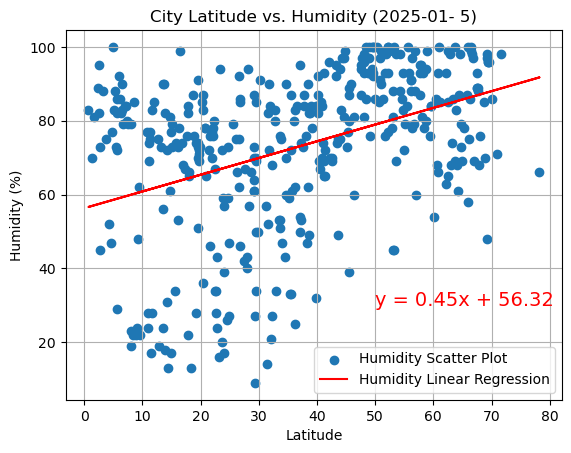

| PyPlot flushed:
| Be advised - not saving


In [37]:
# Northern Hemisphere
gcs.r_plot(hemi_north_df, 'Lat', 'Humidity', (50, 30))
gcs.flush()

The r^2-value is:                0.06879204392384305
The correlation coefficient is:  0.2622823744056071


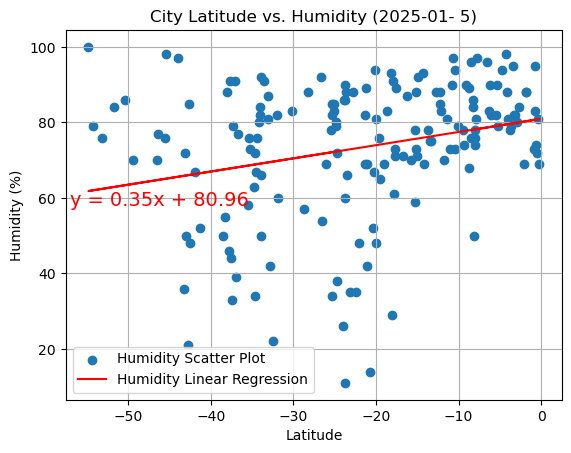

| PyPlot flushed:
| Be advised - not saving


In [38]:
# Southern Hemisphere
gcs.r_plot(hemi_south_df, 'Lat', 'Humidity', (-57, 58))
gcs.flush()

##### **Discussion about the linear relationship:**  
The humidity of cities depending on the Latitude still maintains somewhat of a relationship,  
at least with some Weak correlation still (0.4 and 0.26) for the Northern and Southern  
Hemispheres. However strongly they may correlate, the linear relationship between Latitude  
and Humidity is not very strong especially in the Souther Hemisphere. The calculated linear  
relationship (least of squares) method for finding regression, is actually mimicked quite  
well in the two halves with slopes of approximately 0.35 and 0.45. A linear method will  
not end up being incredibly accurate, though what's most telling is how the data begins to  
group together again as the latitude reaches the equator, just like when measuring latitude  
versus max temperature.

#### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is:                0.08542805610023353
The correlation coefficient is:  0.29228078298142274


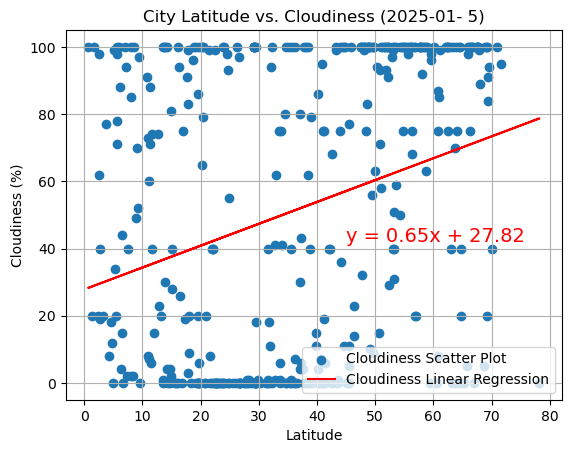

| PyPlot flushed:
| Be advised - not saving


In [39]:
# Northern Hemisphere
gcs.r_plot(hemi_north_df, 'Lat', 'Cloudiness', (45, 42))
gcs.flush()

The r^2-value is:                0.043618882259753154
The correlation coefficient is:  0.20885134009566028


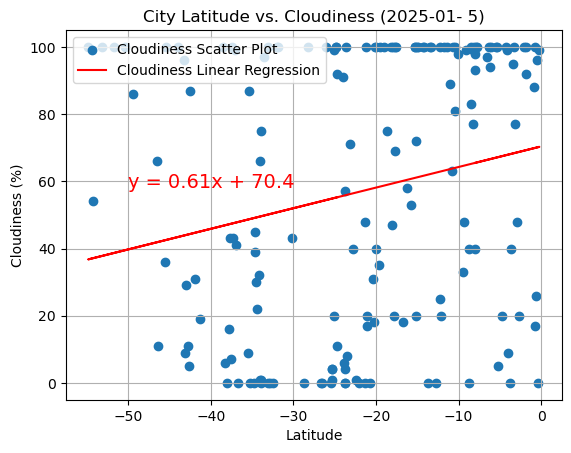

| PyPlot flushed:
| Be advised - not saving


In [40]:
# Southern Hemisphere
gcs.r_plot(hemi_south_df, 'Lat', 'Cloudiness', (-50, 58))
gcs.flush()

##### **Discussion about the linear relationship:**

#### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is:                0.03242328731373693
The correlation coefficient is:  0.1800646753634286


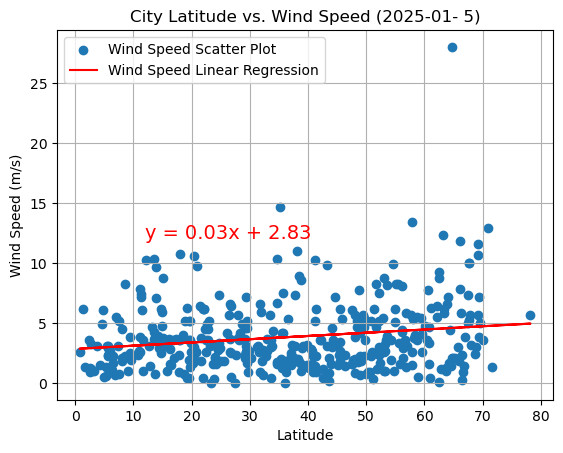

| PyPlot flushed:
| Be advised - not saving


In [41]:
# Northern Hemisphere
gcs.r_plot(hemi_north_df, 'Lat', 'Wind Speed', (12, 12))
gcs.flush()

The r^2-value is:                0.11149351263321555
The correlation coefficient is: -0.33390644293456745


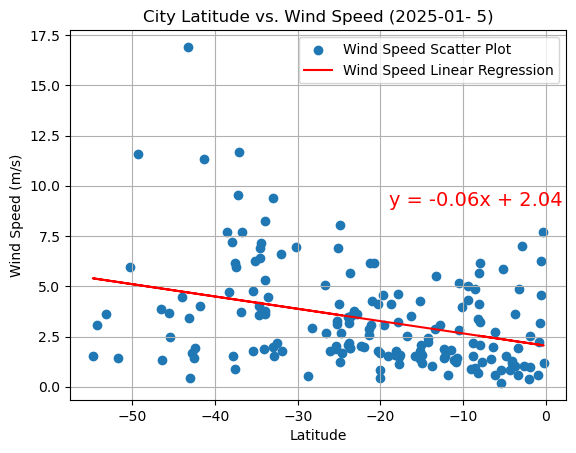

| PyPlot flushed:
| Be advised - not saving


In [42]:
# Southern Hemisphere
gcs.r_plot(hemi_south_df, 'Lat', 'Wind Speed', (-19, 9))
gcs.flush()

##### **Discussion about the linear relationship:**